# Data Cleaning

In [6]:
import pandas as pd

filePath = "1mm.csv"
columns = ['rank', 'number', 'interval']
df = pd.read_csv(filePath, names=columns, header=0)

print("Data Awal:")
print(df.head())

for col in columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(inplace=True)
print("\nData Setelah Pembersihan:")
print(df.head())


Data Awal:
   rank  number  interval
0     1     2.0       2.0
1     2     3.0       NaN
2     3     5.0       2.0
3     4     NaN       NaN
4     5    11.0       NaN

Data Setelah Pembersihan:
   rank  number  interval
0     1     2.0       2.0
2     3     5.0       2.0
5     6    13.0       2.0
6     7    17.0       4.0
7     8    19.0       2.0


# Filtering Data

In [8]:
df_filtered = df[df['rank'] > 5]
print("\nData Setelah Filtering (rank > 5):")
print(df_filtered.head())



Data Setelah Filtering (rank > 5):
    rank  number  interval
5      6    13.0       2.0
6      7    17.0       4.0
7      8    19.0       2.0
8      9    23.0       4.0
10    11    31.0       2.0


# Standarisasi

In [9]:
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
df_standard = scaler_standard.fit_transform(df_filtered)
print("\nData Standarisasi (z-score):")
print(df_standard[:5])



Data Standarisasi (z-score):
[[-1.73205254 -1.65215942 -1.03884135]
 [-1.73204908 -1.65215854 -0.88477857]
 [-1.73204561 -1.65215809 -1.03884135]
 [-1.73204215 -1.65215721 -0.88477857]
 [-1.73203522 -1.65215544 -1.03884135]]


# Normalisasi

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
df_normalized = scaler_minmax.fit_transform(df_filtered)
print("\nData Normalisasi (0-1):")
print(df_normalized[:5])


Data Normalisasi (0-1):
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000700e-06 2.58300419e-07 1.31578947e-02]
 [2.00001400e-06 3.87450629e-07 0.00000000e+00]
 [3.00002100e-06 6.45751049e-07 1.31578947e-02]
 [5.00003500e-06 1.16235189e-06 0.00000000e+00]]


# Clustering

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Misalnya kita tentukan 3 cluster
df_filtered['Cluster'] = kmeans.fit_predict(df_normalized)

print("\nHasil Clustering:")
print(df_filtered.head())



Hasil Clustering:
    rank  number  interval  Cluster
5      6    13.0       2.0        2
6      7    17.0       4.0        2
7      8    19.0       2.0        2
8      9    23.0       4.0        2
10    11    31.0       2.0        2


<ipython-input-11-b883ad453367>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cluster'] = kmeans.fit_predict(df_normalized)


# Visualisasi

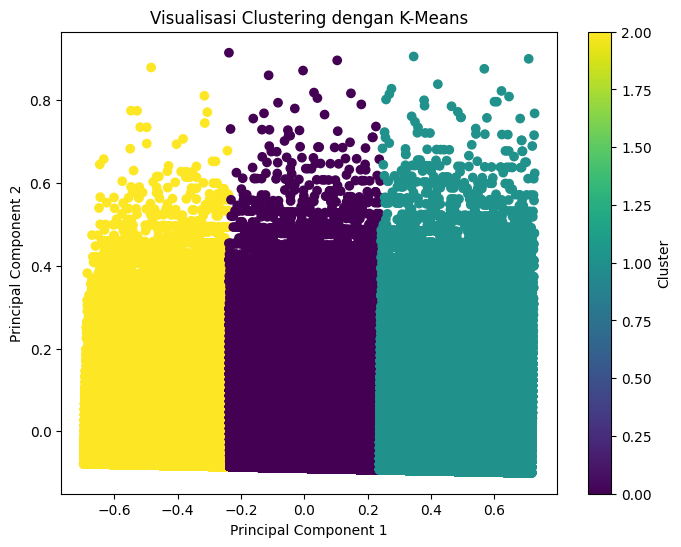

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalized)
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_filtered['Cluster'], cmap='viridis')
plt.title("Visualisasi Clustering dengan K-Means")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()
